In [1]:
import csv
import gsw
import numpy as np
import pycnv
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from cmocean import cm as cmo

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
import warnings
warnings.filterwarnings("ignore")


  # Silence warnings

# If want to fix warnings:
# * start_time = 02 May 2025 13:45:00    #(for example)
# * interval = seconds: 0.25             #(for example)


INFO:pycnv: Opening file: C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project\PROJECT-1\Data\CTD_05_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project\PROJECT-1\Data\CTD_06_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project\PROJECT-1\Data\CTD_07_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project\PROJECT-1\Data\CTD_08_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project\PROJECT-1\Data\CTD_09_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: C:\Users\Sussi\OneD

Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date


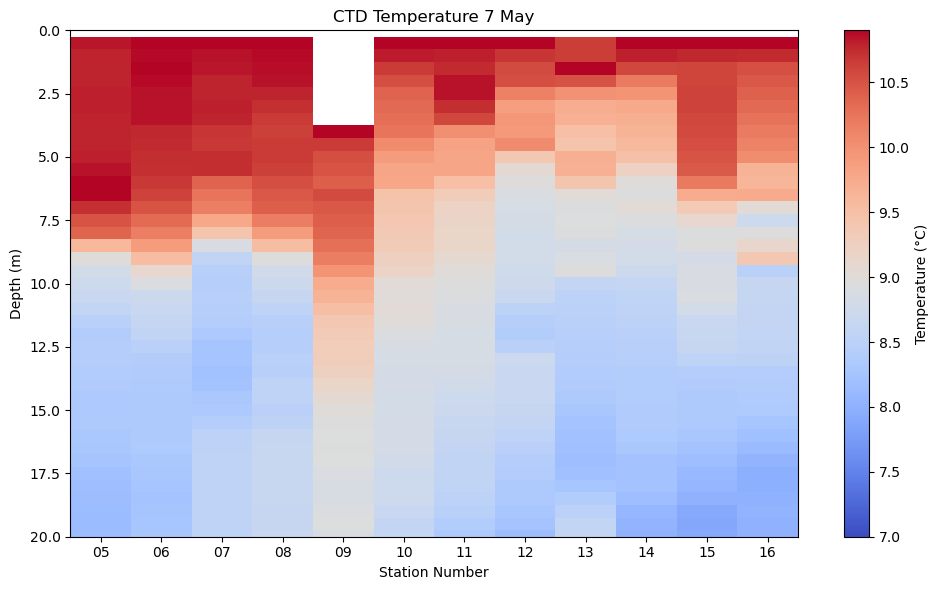

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pycnv
import os
from cmocean import cm as cmo

# Folder and filenames
data_folder = r'C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project\PROJECT-1\Data'
fnames = [
    'CTD_05_avg.cnv',
    'CTD_06_avg.cnv',
    'CTD_07_avg.cnv',
    'CTD_08_avg.cnv',
    'CTD_09_avg.cnv',
    'CTD_10_avg.cnv',
    'CTD_11_avg.cnv',
    'CTD_12_avg.cnv',
    'CTD_13_avg.cnv',
    'CTD_14_avg.cnv',
    'CTD_15_avg.cnv',
    'CTD_16_avg.cnv'
]

all_depths = []
all_temps = []

for fname in fnames:
    cnv = pycnv.pycnv(os.path.join(data_folder, fname))
    all_depths.append(np.array(cnv.data['depSM']))
    all_temps.append(np.array(cnv.data['t090C']))

# Plot
plt.figure(figsize=(10, 6))

for i, (depth, temp) in enumerate(zip(all_depths, all_temps)):
    # Compute edges for depth
    depth_edges = np.concatenate([
        [depth[0] - (depth[1] - depth[0]) / 2],
        (depth[1:] + depth[:-1]) / 2,
        [depth[-1] + (depth[-1] - depth[-2]) / 2]
    ])

    x_edges = [i - 0.5, i + 0.5]

    X_grid, Y_grid = np.meshgrid(x_edges, depth_edges)

    # Expand temp to match (M-1, N-1) = (len(depth), 1)
    T = temp.reshape(-1, 1)

    plt.pcolormesh(X_grid, Y_grid, T, shading='auto', cmap='coolwarm', vmin=7)

# Finalize
plt.gca().invert_yaxis()
plt.colorbar(label='Temperature (°C)')
plt.xticks(np.arange(len(fnames)), [f.split('_')[1] for f in fnames])
plt.xlabel('Station Number')
plt.ylim(20,0)
plt.ylabel('Depth (m)')
plt.title('CTD Temperature 7 May')
plt.tight_layout()
plt.show()


In [15]:
print(cnv.names)              # shows every short name you can use


{'scan': 'Scan Count', 'prDM': 'Pressure, Digiquartz [db]', 't090C': 'Temperature [ITS-90, deg C]', 'c0S/m': 'Conductivity [S/m]', 'flECO-AFL': 'Fluorescence, WET Labs ECO-AFL/FL [mg/m^3]', 'sbeox0V': 'Oxygen raw, SBE 43 [V]', 'turbWETntu0': 'Turbidity, WET Labs ECO [NTU]', 'depSM': 'Depth [salt water, m]', 'depSM@7': 'Depth [salt water, m], lat = 57.8808', 'sal00': 'Salinity, Practical [PSU]', 'sbeox0Mm/L': 'Oxygen, SBE 43 [umol/l], WS = 2', 'sbeox0PS': 'Oxygen, SBE 43 [% saturation], WS = 2', 'flag': 'flag'}


INFO:pycnv: Opening file: C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project\PROJECT-1\Data\CTD_05_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project\PROJECT-1\Data\CTD_06_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project\PROJECT-1\Data\CTD_07_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project\PROJECT-1\Data\CTD_08_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project\PROJECT-1\Data\CTD_09_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: C:\Users\Sussi\OneD

Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date


INFO:pycnv: Opening file: C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project\PROJECT-1\Data\CTD_13_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project\PROJECT-1\Data\CTD_14_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project\PROJECT-1\Data\CTD_15_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project\PROJECT-1\Data\CTD_16_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm


Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date


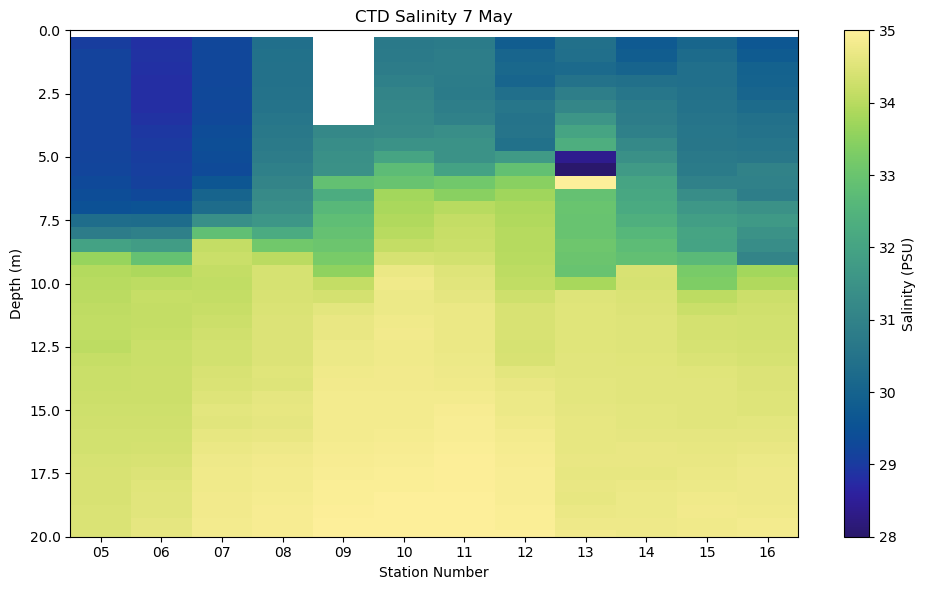

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pycnv, os
from cmocean import cm as cmo          # has a nice 'haline' palette

# ------------------------------------------------------------------
# 1. Load depth and salinity into two parallel lists
# ------------------------------------------------------------------
all_depths = []
all_sals   = []                        # better plural name

for fname in fnames:
    cnv = pycnv.pycnv(os.path.join(data_folder, fname))
    all_depths.append(np.asarray(cnv.data['depSM']))
    all_sals.append( np.asarray(cnv.data['sal00']) )   # <─ salinity

# ------------------------------------------------------------------
# 2. Plot: iterate over depth & sal *together*
# ------------------------------------------------------------------
plt.figure(figsize=(10, 6))

for i, (depth, sal) in enumerate(zip(all_depths, all_sals)):
    # depth-bin edges
    depth_edges = np.concatenate(([depth[0]-(depth[1]-depth[0])/2],
                                  (depth[1:]+depth[:-1])/2,
                                  [depth[-1]+(depth[-1]-depth[-2])/2]))
    x_edges = [i-0.5, i+0.5]
    X, Y    = np.meshgrid(x_edges, depth_edges)

    S = sal.reshape(-1, 1)            # reshape salinity profile
    plt.pcolormesh(X, Y, S,
                   shading='auto',
                   cmap=cmo.haline,   # nicer for salinity
                   vmin=28, vmax=35)  # adjust if your range differs

# ------------------------------------------------------------------
# 3. Finish the figure
# ------------------------------------------------------------------
plt.gca().invert_yaxis()
plt.colorbar(label='Salinity (PSU)')
plt.xticks(np.arange(len(fnames)), [f.split('_')[1] for f in fnames])
plt.xlabel('Station Number')
plt.ylim(20, 0)
plt.ylabel('Depth (m)')
plt.title('CTD Salinity 7 May')
plt.tight_layout()
plt.show()


INFO:pycnv: Opening file: C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project\PROJECT-1\Data\CTD_13_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm


Loading CTD_13_avg.cnv
Date
Computing date

Salinity range: 19.9303 → 35.8717
How many NaNs?  0
Flag values present: [0.]

Rows that are flagged or NaN:
Empty DataFrame
Columns: [Depth (m), Salinity PSU, Flag]
Index: []


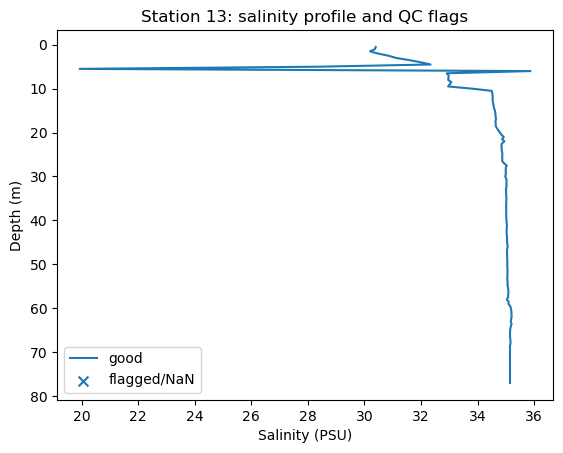

In [20]:
import os, numpy as np, pandas as pd, pycnv

# ---- pick the cast you want to inspect ---------------------------------
idx   = 8                        # 0-based ⇒ CTD_13_avg.cnv
fname = fnames[idx]
print(f"Loading {fname}")

cnv = pycnv.pycnv(os.path.join(data_folder, fname))

# ---- gather the main vectors ------------------------------------------
depth = np.asarray(cnv.data['depSM'])
sal   = np.asarray(cnv.data['sal00'])

# 'flag' exists in your file list (we saw it earlier)
flag  = np.asarray(cnv.data['flag'])

# ---- quick overview ----------------------------------------------------
print("\nSalinity range:", np.nanmin(sal), "→", np.nanmax(sal))
print("How many NaNs? ", np.isnan(sal).sum())
print("Flag values present:", np.unique(flag))

# ---- build a tidy table for inspection --------------------------------
df = pd.DataFrame({"Depth (m)": depth,
                   "Salinity PSU": sal,
                   "Flag": flag})
# keep only bad or missing rows
bad = df[(df["Flag"] != 0) | df["Salinity PSU"].isna()]
print("\nRows that are flagged or NaN:")
print(bad.head(20))              # change or drop .head() to see all

# optional: plot salinity profile with flagged points highlighted
import matplotlib.pyplot as plt
plt.figure()
plt.plot(sal, depth, label="good")                # all points
plt.scatter(bad["Salinity PSU"], bad["Depth (m)"],
            marker="x", s=50, label="flagged/NaN")
plt.gca().invert_yaxis()
plt.xlabel("Salinity (PSU)")
plt.ylabel("Depth (m)")
plt.title("Station 13: salinity profile and QC flags")
plt.legend()
plt.show()


INFO:pycnv: Opening file: C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project\PROJECT-1\Data\CTD_05_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project\PROJECT-1\Data\CTD_06_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project\PROJECT-1\Data\CTD_07_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project\PROJECT-1\Data\CTD_08_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project\PROJECT-1\Data\CTD_09_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: C:\Users\Sussi\OneD

Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date


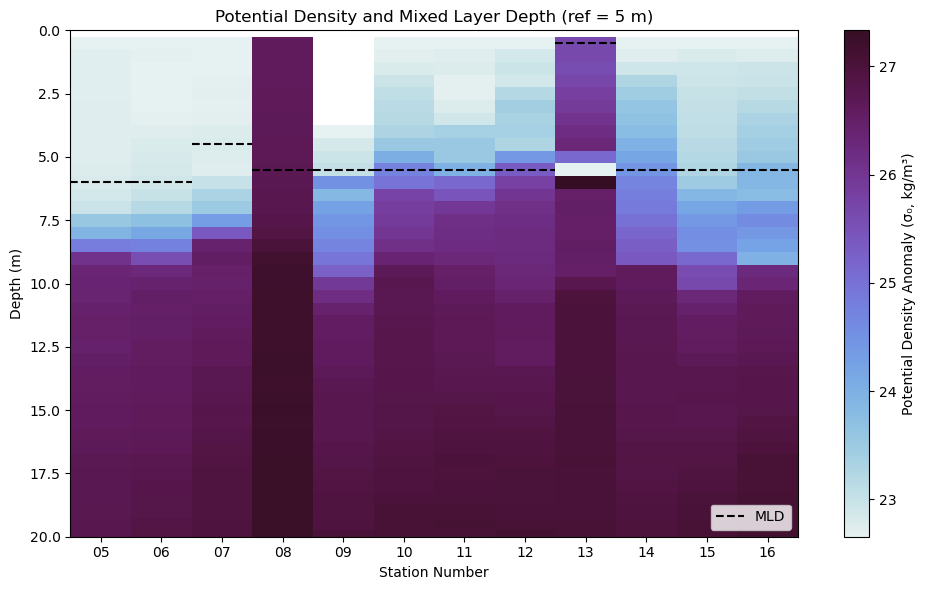

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pycnv
import os
import gsw
from cmocean import cm as cmo  # <- added import for colormap

# Folder and filenames
data_folder = r'C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project\PROJECT-1\Data'
fnames = [
    'CTD_05_avg.cnv',
    'CTD_06_avg.cnv',
    'CTD_07_avg.cnv',
    'CTD_08_avg.cnv',
    'CTD_09_avg.cnv',
    'CTD_10_avg.cnv',
    'CTD_11_avg.cnv',
    'CTD_12_avg.cnv',
    'CTD_13_avg.cnv',
    'CTD_14_avg.cnv',
    'CTD_15_avg.cnv',
    'CTD_16_avg.cnv'
]

# Set reference depth
ref_depth = 5  # meters

all_depths = []
all_sigma0 = []
mld_list = []

for fname in fnames:
    cnv = pycnv.pycnv(os.path.join(data_folder, fname))

    p = np.array(cnv.data['p'])
    t = np.array(cnv.data['t090C'])
    sp = np.array(cnv.data['sal00'])
    lat = cnv.lat
    lon = cnv.lon
    depth = np.array(cnv.data['depSM'])

    # Compute SA and CT
    SA = gsw.SA_from_SP(sp, p, lon, lat)
    CT = gsw.CT_from_t(SA, t, p)

    # Compute sigma0
    sigma0 = gsw.sigma0(SA, CT)

    # --- Reference density at fixed depth (10 m) ---
    try:
        sigma0_ref = np.interp(ref_depth, depth, sigma0)
    except Exception:
        sigma0_ref = np.nan

    # Mixed layer depth threshold method
    mld = np.nan
    for d, s in zip(depth, sigma0):
        if s - sigma0_ref > 0.03:
            mld = d
            break
    mld_list.append(mld)

    all_depths.append(depth)
    all_sigma0.append(sigma0)

# --- Plot ---
plt.figure(figsize=(10, 6))

for i, (depth, sigma, mld) in enumerate(zip(all_depths, all_sigma0, mld_list)):
    if len(depth) < 2:
        continue  # Skip if too few points for edges

    # Compute edges
    depth_edges = np.concatenate([
        [depth[0] - (depth[1] - depth[0]) / 2],
        (depth[1:] + depth[:-1]) / 2,
        [depth[-1] + (depth[-1] - depth[-2]) / 2]
    ])
    x_edges = [i - 0.5, i + 0.5]
    X_grid, Y_grid = np.meshgrid(x_edges, depth_edges)
    S = sigma.reshape(-1, 1)

    # Plot sigma0
    pcm = plt.pcolormesh(X_grid, Y_grid, S, shading='auto', cmap=cmo.dense,
                         vmin=np.nanmin(sigma), vmax=np.nanmax(sigma))

    # Plot MLD
    if not np.isnan(mld):
        plt.hlines(mld, i - 0.5, i + 0.5, color='black', linewidth=1.5, linestyle='--',
                   label='MLD' if i == 0 else "")

# Finalize
plt.gca().invert_yaxis()
plt.colorbar(pcm, label='Potential Density Anomaly (σ₀, kg/m³)')
plt.xticks(np.arange(len(fnames)), [f.split('_')[1] for f in fnames])
plt.xlabel('Station Number')
plt.ylim(20,0)
plt.ylabel('Depth (m)')
plt.title(f'Potential Density and Mixed Layer Depth (ref = {ref_depth} m)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
